### Real - time face detection identifier

In [1]:
import cv2 # getting frames / live images from camera app

In [2]:
my_webcam = cv2.VideoCapture(0) # initializing the  webcam  OBJ   (0 means default)
# The obj has read() n release() methods to grab or drop frames respectively 

### Getting input  from camera

In [3]:
while True:
    frame_is_read, frame = my_webcam.read() # continously grabbing frames 
    cv2.imshow("Camera output: ", frame)

    # if i press "E" then we stop getting frames from camera
    if cv2.waitKey(1) & 0xFF == ord("e"):
        break
    
my_webcam.release() # close the camera
cv2.destroyAllWindows() # delete all frames produced in this loop 

### Pre- processing an open souce data before making the model

In [4]:
import os

In [5]:
emotions_labels = {}

### to speed up we append the processed data to respective folders then convert them in correct format to feed to model

In [6]:
X_train= []
y_train = []

X_test = [] 
y_test = []

In [7]:
training_images_folder = r"C:\Users\nidhi\OneDrive\Documents\small code projects\emotion_detector\train"


# NOTE: when i acess data that inside any folder or file  i must always have a varible of the folders' or file's path first 

for idx, emotions in enumerate(os.listdir(training_images_folder)):# just name of exmotins
    #print(emotions) # printing folder names 
    if emotions not in emotions_labels:
        emotions_labels[emotions] = idx

    emotions_folder =  os.path.join(training_images_folder, emotions) # path beacuse we are yet to acess data

    for images_file in os.listdir(emotions_folder): # just name of imgs
        images = os.path.join(emotions_folder, images_file) # path
        img = cv2.imread(images)
        #print(img.shape) # returns (48, 48, 3) 3 is RGB so for simplicity we'll use grayscalee
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #print(img_gray.shape)
        img_gray = img_gray / 255.0# normalizing image  ie scaling to smaller/more effivient  value
        X_train.append(img_gray)
        y_train.append(idx) # idx == label 
        

     


In [12]:
emotions_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
emotions_labels2 = {}

### Same for test data

In [9]:
test_images_folder = r"C:\Users\nidhi\OneDrive\Documents\small code projects\emotion_detector\test"



for idx, emotions in enumerate(os.listdir(test_images_folder)):
    emotions_labels2[emotions] = idx # if-cond actually not neede 
    emotions_folder =  os.path.join(test_images_folder, emotions) 

    for images_file in os.listdir(emotions_folder): 
        images = os.path.join(emotions_folder, images_file) 
        img = cv2.imread(images)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gray = img_gray / 255.0
        X_test.append(img_gray)
        y_test.append(idx)
        

In [20]:
emotions_labels2 # the folders are in same order in test and train so labels are corrects

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### Converting data

In [10]:
import numpy as np

In [11]:
# NN uses 4D data!! , and ours is 2D greyscale so we manully convet it to 4D
X_train = np.array(X_train).reshape(-1, 48, 48, 1)
y_train = np.array(y_train)

X_test = np.array(X_test).reshape(-1, 48, 48, 1)
y_test = np.array(y_test)

### quick visual on one image

In [12]:
import cv2
import numpy as np

# Get the first image and its label
img_view = X_train[0]
img_bigger = cv2.resize(img_view, (200, 200)) 

label = y_train[0] 


# Show the image in a window
print("Label", label)
cv2.imshow(f"Label - {label}", img_bigger)
cv2.waitKey(0) # Perss any key to end 
cv2.destroyAllWindows()


Label 0


In [ ]:
"""# saving the datsets for later use 

to store datasets

np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)
"""

In [1]:
import numpy as np

#To load back 

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")


### Now Detecting face :

#### first CNN to train and teat then validate it with my camera. The camera input is given to CNN via cv2 we made at the beginning

The NN, we'll use is **CNN**, as our input is an image and CNN are good at recognizing spatial features like a grid of numbers with value b/w  0 and 255.

 Before creating the NN, we should do 2 thing to our data:-

- 1 ) Normalize values from 0 to 255 into values from  0 to 1 :
 Normalization helps improve model performance, stability, and convergence speed by scaling the data to a smaller range. 
   - (^^ Done alreday after getting gray imgaes)

- 2 ) One-hot Encoding of Labels : 
Model actually ingest **float** value called **feature vectors** instead of direct categorical values. 

    So we **CANT** use label 0,1,2...9 as Labels bacuse the model will think these are numerical values, which in reality are Categories.

     1 hot encoding for 3 : [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] ie category 3 feature vector. 

   - (^^ Not needed as our loss func is 'sparse_categorical_crossentropy'
 instead of 'categorical_crossentropy' which undertand categories )
 

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Image to undertand the modle layers:_ 
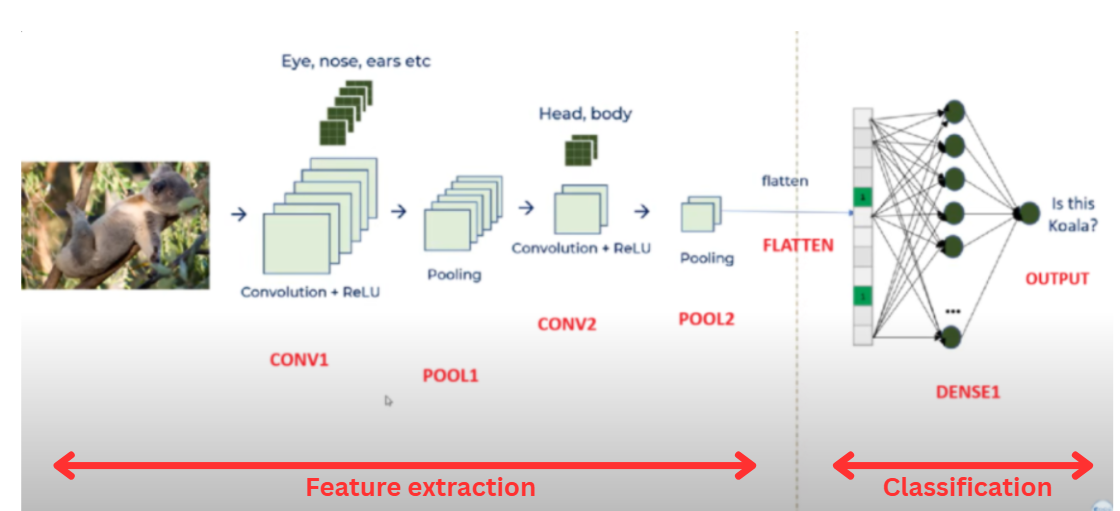

In [3]:
# we'll make 3 layer of COnv and pooling an finall a flatten to get 1D dat and dense

# Layer 1 : 32 filters of size 3x3 , using relu activation func to work with non-linear data and the imput imagr size is 48x4xx1 where 1 means grayscale
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1))
pool1 = MaxPooling2D(pool_size=(2,2))# 1 filter of zixe 2,2 reducces img size with key info

# Layer 2 :  64 filters allow to learn more fetures like head and body (#filters proportional to complexity) creting feature map to which relu is apllied for non-linearity
conv2 =  Conv2D(64, (3, 3), activation='relu') 
pool2 = MaxPooling2D(pool_size=(2,2))

# Layer 3: 128 filters 
conv3 =  Conv2D(128, (3, 3), activation='relu') 
pool3 = MaxPooling2D(pool_size=(2,2))

# Now classification layer 
# 2D output of layer 3  -> 1D to feed to NN in classifiaction parts¡
flatten = Flatten()

dense1 = Dense(128, activation='relu') # dense is fully conncted neurons, here we have 128 neurons

output = Dense(7, activation='softmax') # output layer with 7 neourons  , 1 neuron for each emotion, giving probability prediciton SO SOFMAX ALWAYS has multiple neuron in output layer






c:\Users\nidhi\OneDrive\Documents\small code projects\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Now creting the model and adding the layer to it 
from tensorflow.keras import Sequential

model = Sequential()

model.add(conv1)       
model.add(pool1)       
model.add(conv2)        
model.add(pool2)        
model.add(flatten)     
model.add(dense1)       
model.add(output)   

In [5]:
# just to see the weights and  biases that were creted automatically in in Conv2D layers:
layer_weights, layer_biases = conv1.get_weights()  # Get weights and biases for the first layer (Conv2D)
print("Weights: ", layer_weights)
print("Biases: ", layer_biases)

Weights:  [[[[-0.01710443 -0.1415744   0.00308937  0.02648146  0.00750931
     0.04246332  0.07764845 -0.06072713  0.09210323  0.12518273
    -0.13745923  0.08019876  0.04475254  0.05570462 -0.09918042
     0.01019678  0.04121237 -0.05766938 -0.0988647   0.03402574
    -0.0916028   0.13675223 -0.13279304  0.09734054  0.00577997
    -0.10864272  0.11851694 -0.12943006 -0.11020683  0.13217004
     0.06120552 -0.06421258]]

  [[-0.11450239  0.05903532  0.00404188  0.08881703 -0.01985808
    -0.00515318 -0.12726557  0.12900864  0.01198751 -0.00219972
     0.10477851 -0.00397448 -0.03729492 -0.02868909  0.11233298
    -0.09325004  0.05746928 -0.01696081 -0.06879429 -0.0037169
     0.08692832 -0.11877802  0.12434165  0.01152979  0.03878112
     0.07353668  0.05803363  0.07699376  0.02794011  0.04211557
    -0.05425967 -0.06073208]]

  [[ 0.0034274  -0.10498902  0.08282809 -0.08150381 -0.04493055
     0.03133939 -0.00118534  0.02236524 -0.03936797  0.12937151
    -0.02061133  0.1039169  -0.12

>>Now we compile the model (make loss and GD stuff):-


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# adam == GD 

In [7]:
# training 
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.3134 - loss: 1.7119 - val_accuracy: 0.4281 - val_loss: 1.4897
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4533 - loss: 1.4214 - val_accuracy: 0.4780 - val_loss: 1.3684
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4967 - loss: 1.3144 - val_accuracy: 0.4847 - val_loss: 1.3413
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5311 - loss: 1.2258 - val_accuracy: 0.5130 - val_loss: 1.2661
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5740 - loss: 1.1354 - val_accuracy: 0.5255 - val_loss: 1.2465
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6141 - loss: 1.0383 - val_accuracy: 0.5288 - val_loss: 1.2520
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6419 - loss: 0.9694 - val_accuracy: 0.5400 - val_loss: 1.2480
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6789 - loss: 0.8731 - 

In [9]:
# saving this trained model for future use 
model.save("expression_model.keras")


## Woking on save model

In [ ]:
"""
To load model 

from tensorflow.keras.models import load_model
model = load_model('expression_model.h5')  # or your model file

"""

### Our CNN can classify faces but it needs to detet them first ,   we'll be using open src Haar cascade detection. 

Also, we alreday have code at beginning that can take camera  input now !!
so we intgrate this detion as we get camera input

In [14]:
import cv2

In [15]:
# Loading  Haar cascade detiection 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [16]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

my_webcam = cv2.VideoCapture(0) # initializing the  webcam  OBJ   (0 means default)

while True:

    frame_is_read, frame = my_webcam.read() # continously grabbing frames 
    if not frame_is_read:
        break
    cv2.imshow("Camera output: ", frame)

    # Convert frame to grayscale as we train model on gray scale 
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detecting  faces 
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)


    for (x, y, w, h) in faces:
        # Draws  rectangle around my  face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract face ROI ir Region of Interest ( reduces compuation as model focus on just small part of img)
        face_roi = gray_frame[y:y + h, x:x + w]

        # Preprocess face ROI for my model
        face_roi_resized = cv2.resize(face_roi, (48, 48))
        face_roi_normalized = face_roi_resized / 255.0
        face_roi_reshaped = face_roi_normalized.reshape(1, 48, 48, 1)

        # Predict expression using my model 
        predictions = model.predict(face_roi_reshaped)
        max_index = np.argmax(predictions[0])
        predicted_emotion = emotion_labels[max_index]

        # Puting  label text above face rectangle
        cv2.putText(frame, predicted_emotion, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the resulting frame
    cv2.imshow('Real-Time Facial Expression Recognition', frame)

    # if i press "E" then we stop getting frames from camera
    if cv2.waitKey(1) & 0xFF == ord("e"):
        break
    
my_webcam.release() # close the camera
cv2.destroyAllWindows() # delete all frames produced in this loop 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━